# Climate Change Belief Analysis
**Team 2 JHB July 2020**



# Introduction

### Background  

In a [research article](https://www.barrons.com/articles/two-thirds-of-north-americans-prefer-eco-friendly-brands-study-finds-51578661728) conducted, 19,000 customers from 28 countries where given a poll to find out how individual shopping decisions are changing. Nearly 70% of consumers in the U.S. and Canada find that it is important for a company or brand to be sustainable or eco-friendly. More than a third (40%) of the respondents globally said that they are purpose-driven consumers, who select brands based on how well they align with their personal beliefs.

Many companies are built around lessening their environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.  

The goal of this challenge is to build a Classification Machine Learning model that will determine whether a person believes in Climate Change using tweet data. This model will provide insights of public opinion of Climate Change & consumer sentiment to companies looking to market their new or improved products or services to consumers, in response to CER.

As the demand for sustainable, eco-friendly products and services by consumers increases, a sentiment classification model that identifies these potential customers is key and could be used any business or organisation committed to carbon neutrality & wanting to inform marketing strategies. This includes, but is not limited to companies in the retail, automotive, government, agriculture & food, pharmaceutical spheres. The model could also be used by sectors in government wanting to identify the various belief sentiments in order to better direct environmental awareness and education campaigns in alignment with their legislative directives and climate change response plans.


### Problem statement  

Build a machine learning model that is able to classify whether or not an individual believes in man-made climate change based on historical tweet data to increase insights about customers and inform future marketing strategies.

You can find the project overview [here](https://www.kaggle.com/c/climate-change-edsa2020-21).

# Notebook outline

1. Installations and Imports
2. Explore Data Analysis
3. Data Preprocessing
4. Model Building
5. Model Evaluation
6. Submition
7. Conclusion
8. References

# 1. Installations and Imports

### 1.1 Installations

In [ ]:
pip install comet_ml

     |████████████████████████████████| 235kB 5.2MB/s 
     |████████████████████████████████| 501kB 9.3MB/s 
     |████████████████████████████████| 204kB 10.7MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-cp36-none-any.whl size=34547 sha256=63ea1eb7902a376af1dc68253a0bd1691559ef01be9ed57bcf317b4381009e86
  Stored in directory: /root/.cache/pip/wheels/f1/e4/16/4981ca97c2d65106b49861e0b35e2660695be7219a2d351ee0
Successfully built configobj


### 1.2 Imports

In [ ]:
from comet_ml import Experiment

In [ ]:
# Create an experiment with your api key:
experiment = Experiment(
    api_key="06V8ejxSIh2dFMs9ne4vusQXq",
    project_name="climate-change-belief-analysis",
    workspace="bmqhamane",
)

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/bmqhamane/climate-change-belief-analysis/b3dd63c53d0f412f89d83f8f5dc4e58f



Import python libraries

In [ ]:

# Loading Data
import pandas as pd
import numpy as np
import nltk
import string
import re
import time

# Data Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.utils import resample
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer

# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score

# Model Evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
#from scikitplot.metrics import plot_roc, plot_confusion_matrix

# Explore Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS
from matplotlib.pyplot import rcParams

from sklearn.feature_extraction.text import CountVectorizer




In [ ]:
#download libraries
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
sns.set_style('whitegrid')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


### 1.3 Import Data

In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving resampling.png to resampling.png


We will load our data as a Pandas DataFrame

In [ ]:
train = pd.read_csv('/train.csv')
test = pd.read_csv('/test.csv')

# 2. Exploratory Data Analysis (EDA)

The section is an exploration of the data through an analysis of the different Climate Change sentiments that people have on Twitter.

**Techniques that we are going to use to analyse our data**

- Understanding the distribution of sentiments
- An analysis of the Tweets statistics
- Understanding the length of our tweets
- The main topics on climate change

In [ ]:
#create a copy of the origional data
ftrain = train.copy()
ftest = test.copy()

In [ ]:
print('There are', len(ftrain), 'rows and',ftrain.shape[1], 'columns in the train set.')
print('There are', len(ftest), 'rows and',ftest.shape[1], 'columns in the test set.')

There are 15819 rows and 3 columns in the train set.
There are 10546 rows and 2 columns in the test set.


Checking for null values in the data

In [ ]:
#test data
ftest.isnull().sum()

message    0
tweetid    0
dtype: int64

In [ ]:
#train data
ftrain.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

## 2.1 The distribution of climate change sentiments 




Understanding the distribution of sentiments surrounding climate change on Twitter communicates that there are different views on climate change hence the different classes associated with these views/sentiments.

In [ ]:
a = ftrain.sentiment.value_counts()
b = 100*ftrain.sentiment.value_counts()/len(ftrain.sentiment)
b = round(b,2)
data = pd.concat([a,b],axis =1,)
data.columns = ['Value Count', 'Percentage']
data

,Value Count,Percentage
1,8530,53.92
2,3640,23.01
0,2353,14.87
-1,1296,8.19


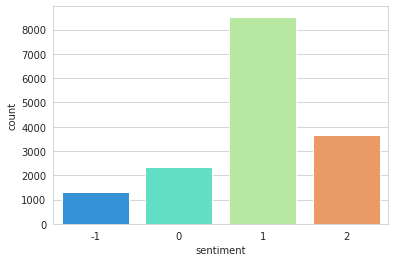

In [ ]:
sns.countplot(x='sentiment',data=ftrain,palette='rainbow')

As seen in the bar graph, sentiment class 1 has the highest number of tweets in the train data accounting for 8530 tweets(53.92%).The lowest sentiment class is class -1 which accounts for 1296 tweets (8.19%).The distribution of sentiments classes are imbalanced because the classes do not have the same ammount of tweets in their class as seen in dataframe which compares the value counts and percentage of each sentiment class.

The class imbalance of the training data has an impact on the classification made on the unseen data (testing data) in the modeling phase.A class imbalance could result in the model classifying most of the tweets into sentiment class 1 since the model gets better a classifying class 1 tweets as the model has more evidence  of class 1 tweets.This will be taken into consideration in the preprocessing and modeling section of the notebook.

##2.2 An analysis of tweets statistics

In [ ]:
ftrain.message.describe()

count                                                 15819
unique                                                14229
top       RT @StephenSchlegel: she's thinking about how ...
freq                                                    307
Name: message, dtype: object

In [ ]:
ftest.message.describe()

count                                                 10546
unique                                                 9575
top       RT @StephenSchlegel: she's thinking about how ...
freq                                                    199
Name: message, dtype: object

In [ ]:
ftrain[['sentiment','message']].groupby('sentiment').describe()

message  ...     
            count  ... freq
sentiment          ...     
-1           1296  ...   22
 0           2353  ...   20
 1           8530  ...  307
 2           3640  ...   12

[4 rows x 4 columns]

Adding a column of the tweets length/word count to the data

In [ ]:
ftrain['length'] = ftrain['message'].apply(len)
ftrain.head()

,sentiment,message,tweetid,length
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,140
1,1,It's not like we lack evidence of anthropogeni...,126103,62
2,2,RT @RawStory: Researchers say we have three ye...,698562,140
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122


In [ ]:
ftest['length'] = ftest['message'].apply(len)
ftest.head()

,message,tweetid,length
0,Europe will now be looking to China to make su...,169760,121
1,Combine this with the polling of staffers re c...,35326,132
2,"The scary, unimpeachable evidence that climate...",224985,139
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,136
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,79


##2.3 The distribution of the tweets length in the data

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


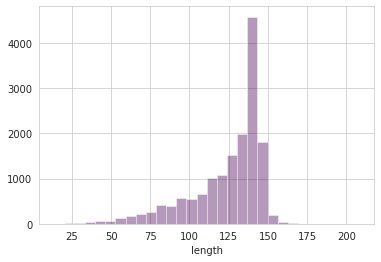

In [ ]:
sns.distplot(ftrain['length'],bins=30,kde=False,color='#440154')

In [ ]:
ftrain['length'].describe()

count    15819.000000
mean       123.774132
std         23.332433
min         14.000000
25%        114.000000
50%        133.000000
75%        140.000000
max        208.000000
Name: length, dtype: float64

In [ ]:
#print the longest tweet in the train data
ftrain[ftrain['length'] == 208]['message'].iloc[0]

"RT @athakur98: i respect differing opinions but i WILL fight you if you don't believe in climate change bc that's Ã°Å¸â€˜ï†\x8fÃ°Å¸ï†\x8fÂ½ not Ã°Å¸â€˜ï†\x8fÃ°Å¸ï†\x8fÂ½ an Ã°Å¸â€˜ï†\x8fÃ°Å¸ï†\x8fÂ½ opinion Ã°Å¸â€˜ï†\x8fÃ°Å¸ï†\x8fÂ½"

The tweets length in the train data lie between 208 characters and 14 characters.The average length of tweets is 123 characters.The longest tweet on climate change in the train data contrains 208 words.The longest tweet stands out from the average length of tweets on climate change which is 123 words.The cell illustrates that the tweet with the most words is simply made up of only a few actual words this will be taken into consideration in the preprocessing section of the notebook to ensure that any noise in the tweets are removed.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


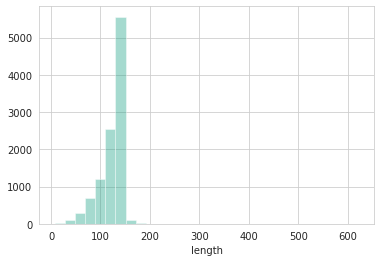

In [ ]:
sns.distplot(ftest['length'],bins=30,kde=False,color='#20A387')

In [ ]:
ftest['length'].describe()

count    10546.000000
mean       123.738764
std         23.752069
min          7.000000
25%        114.000000
50%        132.000000
75%        140.000000
max        623.000000
Name: length, dtype: float64

In [ ]:
ftest[ftest['length'] == 623]['message'].iloc[0]

'RT @Hopeniverse: Ã\xa0Â¸Â£Ã\xa0Â¸ÂµÃ\xa0Â¸Â§Ã\xa0Â¸Â´Ã\xa0Â¸Â§Ã\xa0Â¸Â£Ã\xa0Â¸Âª global warming Ã\xa0Â¸â€žÃ\xa0Â¹Ë†Ã\xa0Â¸Â° Ã\xa0Â¹â€šÃ\xa0Â¸â€\x9dÃ\xa0Â¸â„¢Ã\xa0Â¸Â«Ã\xa0Â¸â„¢Ã\xa0Â¹â€°Ã\xa0Â¸Â²Ã\xa0Â¸â€¢Ã\xa0Â¸Â²Ã\xa0Â¸â„¢Ã\xa0Â¹Ë†Ã\xa0Â¸Â²Ã\xa0Â¸Â£Ã\xa0Â¸Â±Ã\xa0Â¸ï†\x81Ã\xa0Â¸Â«Ã\xa0Â¸Â¥Ã\xa0Â¸Â\xadÃ\xa0Â¸ï†\x81Ã\xa0Â¹Æ’Ã\xa0Â¸Â«Ã\xa0Â¹â€°Ã\xa0Â¸â€¹Ã\xa0Â¸Â·Ã\xa0Â¹â€°Ã\xa0Â¸Â\xadÃ\xa0Â¸Â¡Ã\xa0Â¸Â² Ã\xa0Â¹â‚¬Ã\xa0Â¸Â«Ã\xa0Â¸Â¡Ã\xa0Â¸Â·Ã\xa0Â¸Â\xadÃ\xa0Â¸â„¢Ã\xa0Â¹â‚¬Ã\xa0Â¸â€žÃ\xa0Â¸ÂµÃ\xa0Â¹â€°Ã\xa0Â¸Â¢Ã\xa0Â¸Â§Ã\xa0Â¹â€šÃ\xa0Â¸Â\xadÃ\xa0Â¸Â£Ã\xa0Â¸Â´Ã\xa0Â¹â€šÃ\xa0Â¸Â\xadÃ\xa0Â¹â€°Ã\xa0Â¹ï†\x81Ã\xa0Â¸Â¥Ã\xa0Â¹â€°Ã\xa0Â¸Â§Ã\xa0Â¹ï†\x81Ã\xa0Â¸â€ºÃ\xa0Â¸Â£Ã\xa0Â¸â€¡Ã\xa0Â¸Å¸Ã\xa0Â¸Â±Ã\xa0Â¸â„¢Ã\xa0Â¹â€žÃ\xa0Â¸â€ºÃ\xa0Â¸â€\x9dÃ\xa0Â¹â€°Ã\xa0Â¸Â§Ã\xa0Â¸Â¢Ã\xa0Â¹Æ’Ã\xa0Â¸â„¢Ã\xa0Â¹â‚¬Ã\xa0Â¸Â§Ã\xa0Â¸Â¥Ã\xa0Â¸Â²Ã\xa0Â¹â‚¬Ã\xa0Â¸â€\x9dÃ\xa0Â¸ÂµÃ\xa0Â¸Â¢Ã\xa0Â¸Â§Ã\xa0Â¸ï†\x81Ã\xa0Â¸Â±Ã\xa0Â¸â„¢ https://t.co/XqÃ¢â‚¬Â¦'

The tweet in the test data are betweet 7 characters and 623 characters.On average the tweets in the test data are 123 characters.The longest tweets seem to have soe discrepency because twitter's word limit  on tweets in 280 characters however the longest tweet exceeds this limit.The longest tweet in the data is simply made up of only a few actual words this will be taken into consideration in the preprocessing section of the notebook to ensure that any noise in the tweets are removed 

### The length of tweets per sentiment class

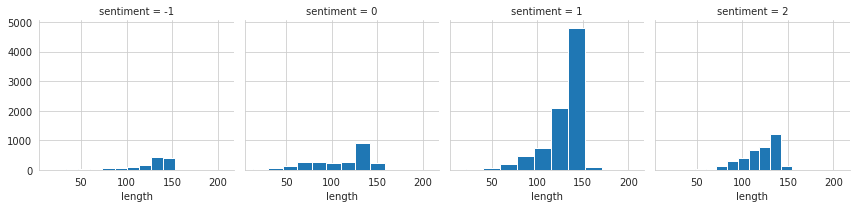

In [ ]:
g = sns.FacetGrid(ftrain,col='sentiment')
g.map(plt.hist,'length')

Tweets that are part of sentiment class one have have the highest length frequency as compared to the other classes. 


##2.4 The main topics surrounding the climate change tweets

An understanding of the main topics dicussed in the climate change discussion on twitter is essential as it illustrates the sentiments attatched to climate change. This is done through extracting the most frequently used words and hashtags.

###2.4.1 Top 30 used words in the tweets

 Train data

Text(0.5, 1.0, 'Train : Most Frequently Occuring Words - Top 30')

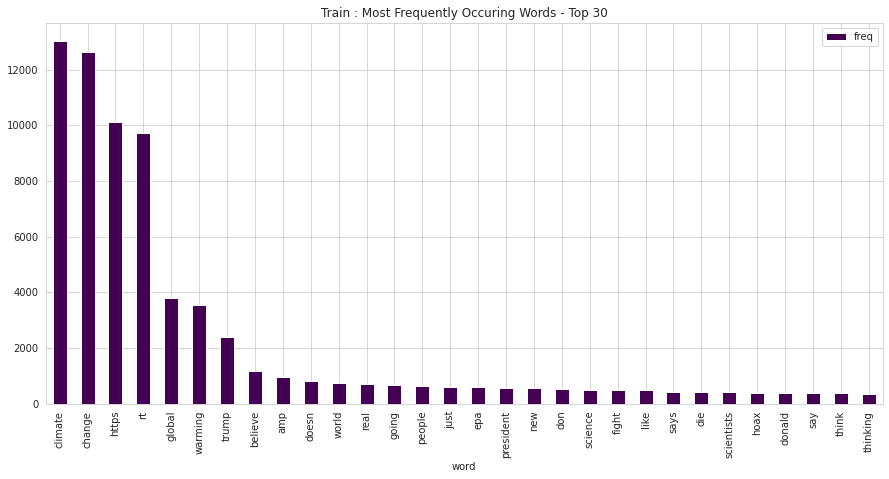

In [ ]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(ftrain.message)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = '#440154')
plt.title("Train : Most Frequently Occuring Words - Top 30")

Test data

Text(0.5, 1.0, 'Test : Most Frequently Occuring Words - Top 30')

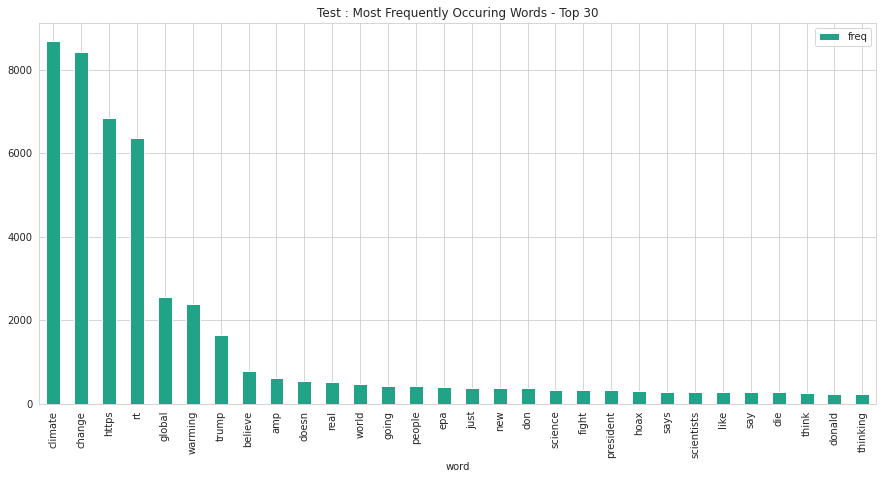

In [ ]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(ftest.message)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = '#20A387')
plt.title("Test : Most Frequently Occuring Words - Top 30")

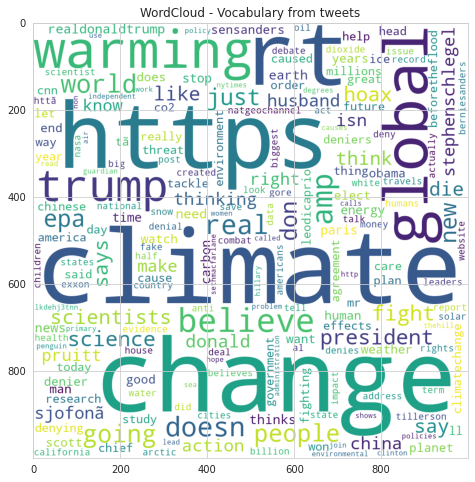

In [ ]:
wordcloud = WordCloud(background_color = 'white', 
                      width = 1000, height = 1000)
                      .generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(8,8))
plt.title("WordCloud - Vocabulary from tweets")
plt.imshow(wordcloud)

### 2.4.2 The top 10 influencial Twitter accounts in the climate change debate

The accounts that recieved the most mentions are Twitter accounts that have engaged with the climate change topic.Twitter users mention these accounts when reposting(retweeting) the twitter accounts sentiment on climate change or responding to the twitter accounts comment on climate change.Within the data these Twitter accounts have played a vital role in fueling the climate change debate on Twitter.

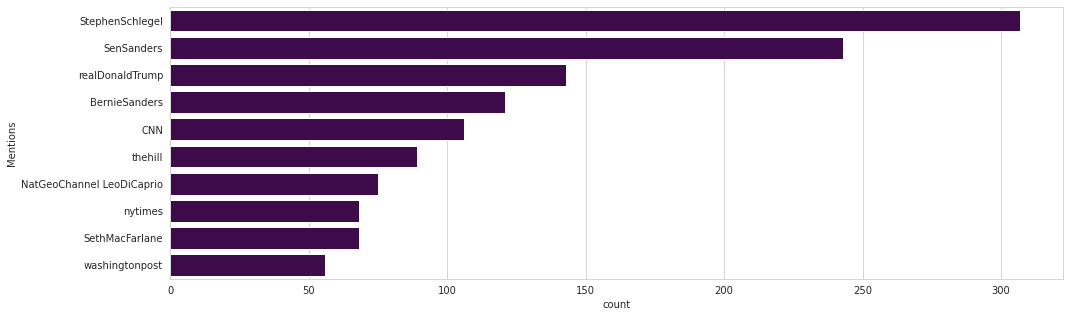

In [ ]:
#function used to extract the mentions from the tweets
def mentions(text):
    line=re.findall(r'(?<=@)\w+',text)
    return " ".join(line)
#train data mentions
ftrain['mentions']=ftrain['message'].apply(lambda x:mentions(x))
temp= ftrain['mentions'].value_counts()[:][1:11]
temp =temp.to_frame().reset_index().rename(columns={'index':'Mentions','mentions':'count'})
plt.figure(figsize=(16,5))
x= temp['Mentions']
y= temp['count']
sns.barplot(x=y,y=x,color='#440154')

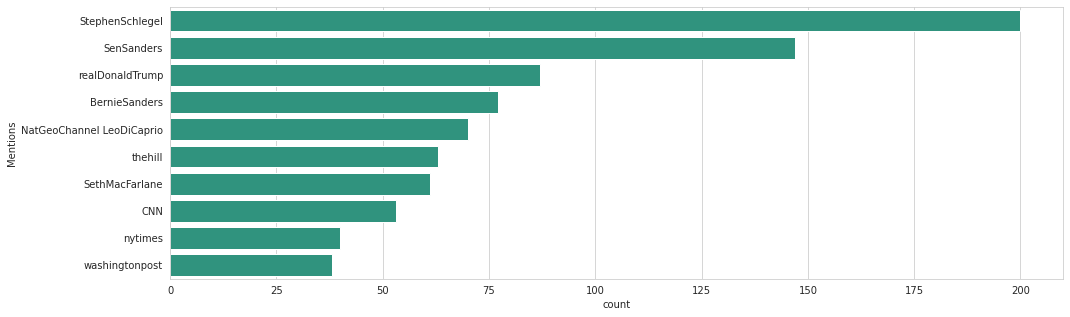

In [ ]:
#test data mentions
ftest['mentions']=ftest['message'].apply(lambda x:mentions(x))

temp1= ftest['mentions'].value_counts()[:][1:11]
temp1 =temp1.to_frame().reset_index().rename(columns={'index':'Mentions','mentions':'count'})
plt.figure(figsize=(16,5))
x= temp1['Mentions']
y= temp1['count']
sns.barplot(x=y,y=x,color='#20A387')



###2.4.3 An analysis of the Hashtags used  per sentiment class

A hashtags is written using the '#' symbol.Its main function is to categorize tweets based on a keyword or a topic associated with the hashtag used. According to the 'Twitter Help Center' website people use hashtags before a relevant phrase or keyword. 

The hashtags used in the climate change tweets highlight the people's interest in the climate change topic.The hashtags that were used communicate that people have divided opinions on climate change.This is relfected in the hashtags used within each sentiment class.  

In [ ]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
# extracting hashtags from train tweets
HT_train_neg = hashtag_extract(ftrain['message'][ftrain['sentiment'] == -1])
HT_train0 = hashtag_extract(ftrain['message'][ftrain['sentiment'] == 0])
HT_train1 = hashtag_extract(ftrain['message'][ftrain['sentiment'] == 1])
HT_train2 = hashtag_extract(ftrain['message'][ftrain['sentiment'] == 2])


# unnesting list
HT_train_neg = sum(HT_train_neg,[])
HT_train0 = sum(HT_train0,[])
HT_train1 = sum(HT_train1,[])
HT_train2 = sum(HT_train2,[])

####2.4.3.1 Top 10 hashtags used in Sentiment class  -1 tweets

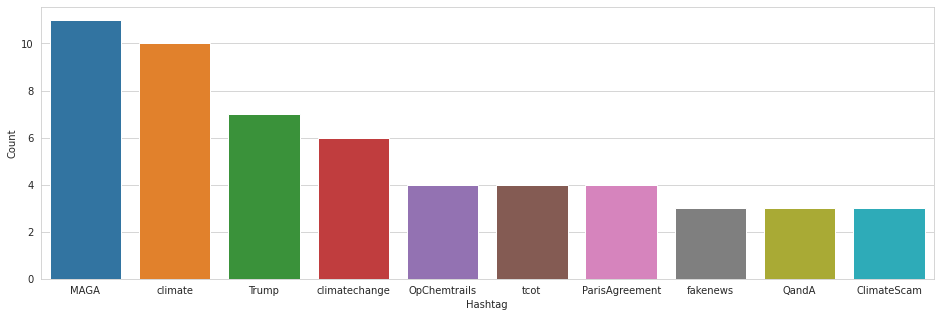

In [ ]:
a = nltk.FreqDist(HT_train_neg)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
#An example of a sentiment found within class -1 tweets
ftrain[ftrain['sentiment'] == -1]['message'].iloc[67]

"RT @Cernovich: Same 'experts' who said Hillary would win claim 'climate change' is real. LOL! Go away, morons, you know nothing and you losÃ¢â‚¬Â¦"

In class -1 the hashtag that was used the most is #MAGA and the second highest being #climate.These keywords were the most used when people were discussing their sentiments concerning climate change.Other interesting hashtags that form part of the top ten hashtags used in class one are #fakenews and #ClimateScam which insinuate that some of the people who were tweeting about climate change believe that is is simply fake news or a scam. The third highest hashtag used is #Trump when discussing climate change. The class focuses more on discussing climate change as being linked to politics hence the hashtag that has been used the most is #MAGA as well as the example of one of the tweets provided in the cell above.

####2.4.3.2 Top 10 hashtags used in Sentiment class 0 tweets

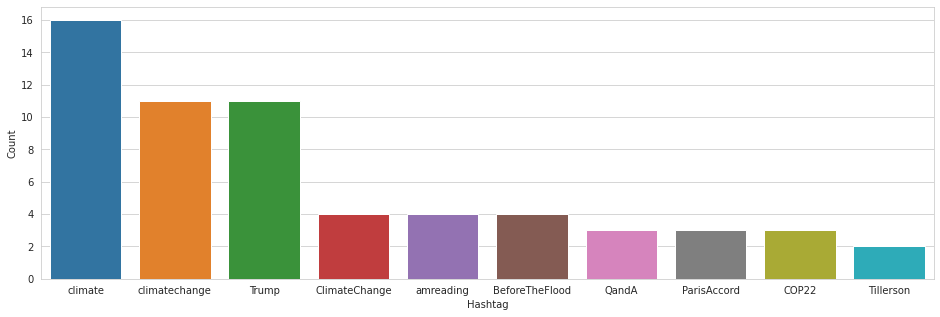

In [ ]:
a = nltk.FreqDist(HT_train0)
c = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags 
c = c.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=c, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
#An example of a sentiment found within class 0 tweets
ftrain[ftrain['sentiment'] == 0]['message'].iloc[184]

'RT @CivilJustUs: How do they expect us to care about global warming with all this penguin on penguin crime?? https://t.co/HypysWHvVV'

In [ ]:
#An example of a sentiment found within class 0 tweets
ftrain[ftrain['sentiment'] == 0]['message'].iloc[197]

"RT @kalistazickert_: 'do you believe in global warming jade?'\nJade: yah bc every day the weather changes @j_sommerhalder"

The keyword that is used the most when discussing climate change is #climate followed by #climatechange.#Trump is a prominent hashtag in class 0 as well.Donald Trump's views on climate change is discussed in the class.An interesting hashtag used by people is #BeforeTheFlood which is a movie that depicts the impacts of climate change on the Earth,as well as #amreading people use this hashtage to tell mention what they a book or article they are currently reading. The sentiments within class 0 are open conversations surrounding climate change including people asking questions about climate change as well as sarcasm.

####2.4.3.3 Top 10 hashtags used in Sentiment class 1 tweets

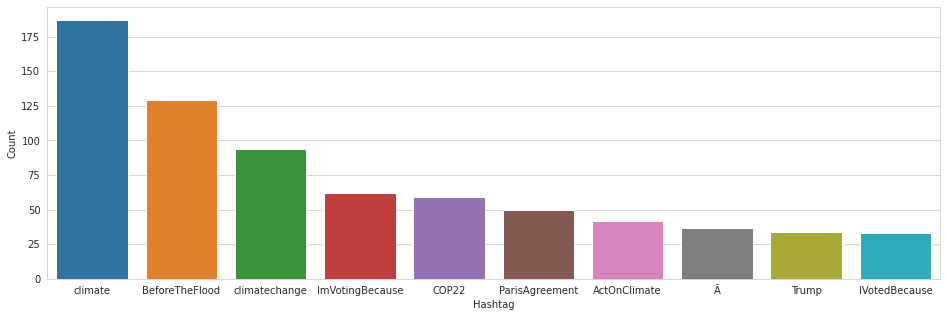

In [ ]:
a = nltk.FreqDist(HT_train1)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
#An example of a sentiment found within class 1 tweets
ftrain[ftrain['sentiment'] == 1]['message'].iloc[89]

'RT @AstroKatie: Governments of several world powers are failing us on climate change. We need to act without them if we want any hope for tÃ¢â‚¬Â¦'

The opinions on climate change in class 1 shift towards climate change does exist as the conversations in this class discuss a movie called Before the flood.The movie highlights the impact of climate change on the Earth.As well as using the hashtag  #ActOnClimate, the tweets associated with the hastag on Twitter mainly discuss ways to combat climate change (http://www.tweepy.net/hashtag/ActOnClimate). 

####2.4.3.4 Top 10 hashtags used in Sentiment class 2 tweets

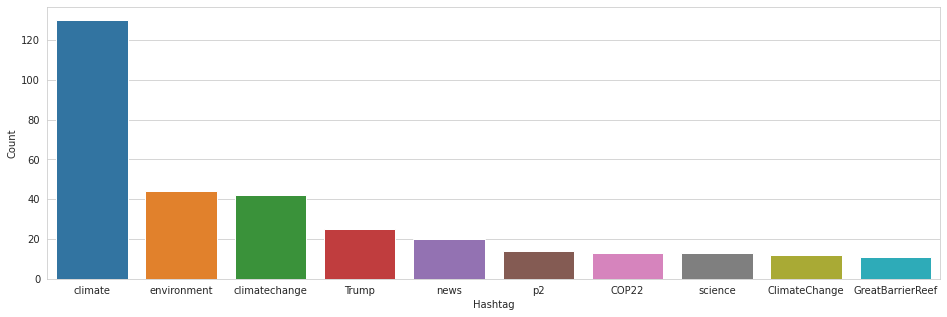

In [ ]:
a = nltk.FreqDist(HT_train2)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
#An example of a sentiment found within class 2 tweets
ftrain[ftrain['sentiment'] == 2]['message'].iloc[1]

'RT @tveitdal: We only have a 5 percent chance of avoiding ‘dangerous’ global warming, a study finds https://t.co/xUBTqNxhkK https://t.co/of…'

The opinions in class one mainly focus on the climate this is evident in the high hashtag count of the word #climate, the second highest is #enviroment .The class is mainly focused on informing people about climate change and its effect on the enviroment.

#2.5 The key findings from the EDA

* There are polarised views on climate change on twitter

* Within the data there exists a class imbalance,this will be considered in the preprocessing and model training section

* An analysis of the hashtags has shown that the tweets in class 1 believe in climate change,class 2 believe and inform people about climate change,class 0 are more neutral and tend to downplay the existence of climate change and class -1 do not believe that climate change exists.



In [ ]:
#class_1 the PRO class
#class 2 the NEWS class
#class 0 NUETRAL class
#class -1 the ANTI class

# 3. Data Preprocessing

Preprocessing involves the elimination of trivial or less informative data, which does not contribute to the sentiment classification. To understand the process of eliminating less informed data, it is important to understand what matters in sentiment analysis. Words are the most important part, however, when it comes to things like punctuation, you cannot get the sentiment from punctuation. Therefore, punctuation does not matter in sentiment analysis. In addition, tweet elements such as images, videos, URLs, usernames, emojis do not contribute to the polarity of the tweet (whether positive or negative). However, this is only true for machine learning models.

**Techniques that we are going to use to clean our data**

- Removing Noise
- Stop Words
- Tokenisation
- Lemmatisation Normalization


###3.1 Dealing with Class Imbalance - Resampling

The EDA highlighted that there is a class imbalance within the data.In training classification model, it is preferable for all classes to have a relatively even split of observations. However, in the wild, classification datasets often come with unevenly distributed observations with one class or set of classes having way more observations than others.This will negatively affecting the accuracy score of the model. Therefore resampling is necessary before training a model with this data.

Resampling methods aim at modifying the dataset in order to reduce the discrepancy among the sizes of the classes. In this regard, two scenarios are proposed: one that eliminates instances from the majority class - called undersampling, and one that generates instances for the minority class - called over-sampling. They both have there pros and cons.In other words, Both oversampling and undersampling involve introducing a bias to select more samples from one class than from another, to compensate for an imbalance that is either already present in the data, or likely to develop if a purely random sample were taken. Pykes mentined that "the random oversampling may increase the likelihood of overfitting occurring since it makes exact copies of the minority class examples. In this way, a symbolic classifier, for instance, might construct rules that are apparently accurate, but actually cove one replicated example" and “In random under-sampling (potentially), vast quantities of data are discarded. This can be highly problematic, as the loss of such data can make the decision boundary between the minority and majority instances harder to learn, resulting in a loss in classification performance.”

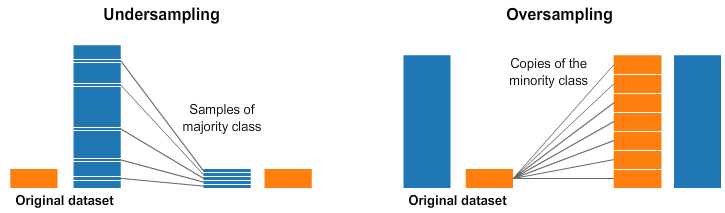

In [ ]:
from IPython.display import Image
Image('resampling.png', width="800" ,height="400")

#### Combining Both Random Sampling Techniques

Combining both random sampling methods can occasionally result in overall improved performance in comparison to the methods being performed in isolation. In this predict we will balance our data by using both methods oversampling and undersampling method. The class size is determined by the average of data points. If a class is less than the average the class will be upsampled and if the class is greater than the average, then the class will be downsampled.

In [ ]:
def resambling(df):
    """
        The functions takes in dataframe and resample the classses base on class size.
        The class size is a average of the datasets among the classes.
        This function resamples by downsampling classes with observations greater than the class size and
        upsampling the classes with observations smaller than the class size.
    """
    df = df.copy()
    class_2 = df[df['sentiment'] == 2]  
    class_1 = df[df['sentiment'] == 1]  
    class_0 = df[df['sentiment'] == 0]  
    class_n1 = df[df['sentiment'] == -1] 
    class_size = int((len(class_1)+len(class_2)+len(class_0)+len(class_n1))/4)
    # Downsampling class_1 the PRO class
    rclass_1 = resample(class_1, replace=True, n_samples=class_size, random_state=42)
    #upsampling class 2 the NEWS class
    rclass_2 = resample(class_2, replace=True, n_samples=class_size, random_state=42)
    #upsampling class 0 NUETRAL class
    rclass_0 = resample(class_0, replace=True, n_samples=class_size, random_state=42)
    #upsampling class -1 the ANTI class
    rclass_n1 = resample(class_n1, replace=True, n_samples=class_size, random_state=42)
    sampled_df = pd.concat([rclass_2, rclass_1, rclass_0, rclass_n1])
    
    return sampled_df

In [ ]:
Resampled_train_df = resambling(ftrain)

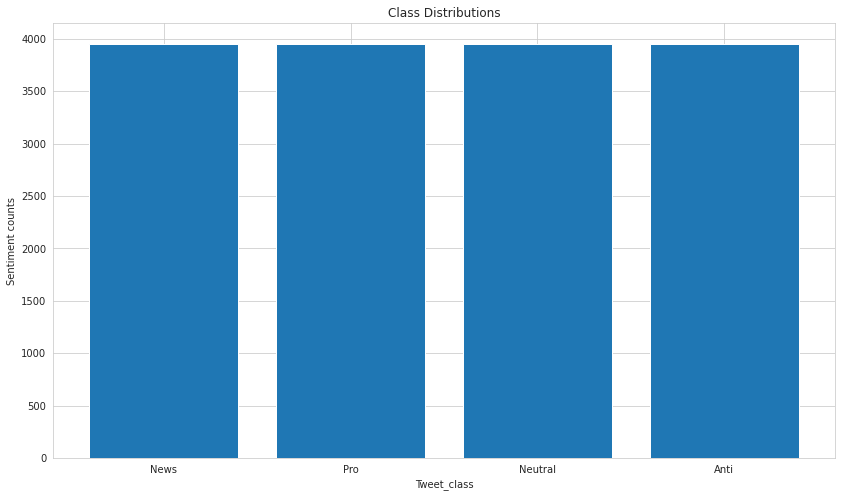

In [ ]:
news=Resampled_train_df[Resampled_train_df.sentiment == 2].shape[0]
pro =Resampled_train_df[Resampled_train_df.sentiment == 1].shape[0]
neutral=Resampled_train_df[Resampled_train_df.sentiment == 0].shape[0]
anti =Resampled_train_df[Resampled_train_df.sentiment == -1].shape[0]
#visualising
plt.figure(1,figsize=(14,8))
plt.bar(["News", "Pro", "Neutral" , "Anti"],[news, pro, neutral , anti])
plt.xlabel('Tweet_class')
plt.ylabel('Sentiment counts')
plt.title('Class Distributions')
plt.show()

## 3.2 Text Cleaning

Before we begin with data cleaning we created copies of the dataframe which allows us to make some changes without changing the original dataframe

In [ ]:
# Creating copies of dataframes
train_copy = Resampled_train_df.copy()
test_copy = ftest.copy()

### 3.2.1 Removing Noise

In text analysis, eliminating noise  is the most important part of getting the data into usable format. 

We will remove noise with the foolllowing steps.
- Convert letters to lowercases
- Remove URL links 
- Remove hashtag/numbers
- Remove punctuation

In [ ]:
def cleaner(tweet):
    """
    this function takes in a dataframe and perform the following:
    -Convert letters to lowercases
    -remove URL links
    -remove # from hashtags
    -remove numbers
    -remove punctuation
    from the text field then return a clean dataframe 
    """
    tweet = tweet.lower()
    to_del = [
        r"@[\w]*",  # strip account mentions
        r"http(s?):\/\/.*\/\w*",  # strip URLs
        r"#\w*",  # strip hashtags
        r"\d+",  # delete numeric values
        r"U+FFFD",  # remove the "character note present" diamond
    ]
    for key in to_del:
        tweet = re.sub(key, "", tweet)
    
    # strip punctuation and special characters
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", " ", tweet)
    # strip excess white-space
    tweet = re.sub(r"\s\s+", " ", tweet)
    
    return tweet.lstrip(" ")

In [ ]:
train_copy['message'] = train_copy['message'].apply(cleaner)

In [ ]:
train_copy.tail(5)

,sentiment,message,tweetid,length
8465,-1,rt the trump administration just disbanded a u...,186714,140
5083,-1,rt why would a political scientist noam chomsk...,95774,145
15460,-1,science-fiction personality preaches a fearful...,726028,132
1182,-1,rt a bunch of oxford elitists want to tax the ...,19105,146
815,-1,freezing -c tonight whens global warming comin...,477360,56


### 3.2.2 Removing Stop Words

The stop words are the most common words like "if", "but", "we", "he", "she" and "she". We can usually remove these words without changing the semantics of any text, and doing so often (but not always) improves the performance of a model. Removing these stop words becomes much more useful when we use longer sequences of words as model features.

In [ ]:
stop_word = stopwords.words('english')
train_copy['message'] = train_copy['message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_word)]))

In [ ]:
train_copy.head(5)

,sentiment,message,tweetid,length
13776,2,rt europe faces droughts floods storms change ...,849649,124
15247,2,el nino warming planet may sparked zika epidem...,610545,127
3533,2,rt trump says keeping open mind climate change...,625516,140
5570,2,rt sierra club calls investigation epa head cl...,86301,137
4824,2,tackling climate change boost economic growth ...,291460,85


### 3.2.3 Tokenisation

Tokenization is a process of breaking the raw text into small chunks. Tokenization breaks the raw text into words, sentences called tokens. A token is a piece of a whole, so a word is a token in a sentence, and a sentence is a token in a paragraph. Tokenization is the process of splitting a string into a list of tokens. These tokens help in understanding the context or developing the model for the NLP. The tokenization helps in interpreting the meaning of the text by analyzing the sequence of the words. For example, the text “It is raining” can be tokenized into ‘It’, ‘is’, ‘raining’

In [ ]:
tokeniser = TreebankWordTokenizer()
train_copy['tokens'] = train_copy['message'].apply(tokeniser.tokenize)

In [ ]:
train_copy.head(5)

,sentiment,message,tweetid,length,tokens
13776,2,rt europe faces droughts floods storms change ...,849649,124,"[rt, europe, faces, droughts, floods, storms, ..."
15247,2,el nino warming planet may sparked zika epidem...,610545,127,"[el, nino, warming, planet, may, sparked, zika..."
3533,2,rt trump says keeping open mind climate change...,625516,140,"[rt, trump, says, keeping, open, mind, climate..."
5570,2,rt sierra club calls investigation epa head cl...,86301,137,"[rt, sierra, club, calls, investigation, epa, ..."
4824,2,tackling climate change boost economic growth ...,291460,85,"[tackling, climate, change, boost, economic, g..."


### 3.2.4 Lemmatisation

In [ ]:
def lemmas(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]

In [ ]:
lemmatizer = WordNetLemmatizer()
train_copy['lemma'] = train_copy['tokens'].apply(lemmas, args=(lemmatizer, ))

In [ ]:
train_copy.head(5)

,sentiment,message,tweetid,length,tokens,lemma
13776,2,rt europe faces droughts floods storms change ...,849649,124,"[rt, europe, faces, droughts, floods, storms, ...","[rt, europe, face, drought, flood, storm, chan..."
15247,2,el nino warming planet may sparked zika epidem...,610545,127,"[el, nino, warming, planet, may, sparked, zika...","[el, nino, warming, planet, may, sparked, zika..."
3533,2,rt trump says keeping open mind climate change...,625516,140,"[rt, trump, says, keeping, open, mind, climate...","[rt, trump, say, keeping, open, mind, climate,..."
5570,2,rt sierra club calls investigation epa head cl...,86301,137,"[rt, sierra, club, calls, investigation, epa, ...","[rt, sierra, club, call, investigation, epa, h..."
4824,2,tackling climate change boost economic growth ...,291460,85,"[tackling, climate, change, boost, economic, g...","[tackling, climate, change, boost, economic, g..."


# 4. Text Feature Extraction

## 4.1 Bag of words

The simplest way to transform text documents into numerical data, known as Bag of Words, is to consider a number of features equal to the number of words in the corpus. Then, for each document, the value of each feature is given by the number of occurrences of that word within the current document.

## 4.2 Count Vector / TfidfVectorizer

# 5. Model Building

## 5.1 Splitting out the X variable from the target

In [ ]:
train_copy.sentiment.value_counts()

-1    3954
 2    3954
 1    3954
 0    3954
Name: sentiment, dtype: int64

In [ ]:
y = train_copy['sentiment']
X = train_copy['message']

## 5.2 Data tranformation with TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2, stop_words="english")
X_vectorized = vectorizer.fit_transform(X)

### 4.2 Splitting the training data into a training and validation set

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X_vectorized,y,test_size=.3,shuffle=True, stratify=y, random_state=11)

### 4.3 Model Fitting

### 4.3.1 Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(X_train, y_train)

### 4.3.2 Logistic Classifier

In [ ]:
lmc = LogisticRegression(solver = 'lbfgs')
lmc.fit(X_train, y_train)

### 4.3.3 Decision Tree Classifier

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)

In [ ]:
dtc.fit(X_train, y_train)

### 4.3.4 Support vector machine Classifier

In [ ]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# 5. Model Evaluation

## 5.1 Model evaluation using validation data

### 5.1.1 Random Forest Classifier

In [ ]:
rfc_pred = rfc.predict(X_val)

### 5.1.2 Logistic Classifier

In [ ]:
lmc_pred = lmc.predict(X_val)

### 5.1.3 Decision Tree Classifier

In [ ]:
dtc_pred = dtc.predict(X_val)

### 5.1.4 Support vector machine Classifier

In [ ]:
svc_pred = svc.predict(X_val)

## 5.2 Model evaluation using test data

## 5.2.1 Data tranformation with Vectorizer

In [ ]:
testx = test_copy['message']
test_vect = vectorizer.transform(testx)

## 5.2.2 Making predictions on the test set 

### 5.2.1 Random Forest Classifier

In [ ]:
rfc_pred_t = rfc.predict(test_vect)

### 5.2.2 Logistic Classifier

In [ ]:
lmc_pred_t = lmc.predict(test_vect)

### 5.2.3 Decision Tree Classifier

In [ ]:
dtc_pred_t = dtc.predict(test_vect)

### 5.2.4 Support vector machine Classifier

In [ ]:
svc_pred_t = svc.predict(test_vect)

# 6. Model Analysis

## 6.1 Confusion Matrix

### 6.1.1 Random Forest Classifier

In [ ]:
labels = [-1, 0,1,2]

pd.DataFrame(data=confusion_matrix(y_val, rfc_pred), index=labels, columns=labels)

### 6.1.2 Logistic Classifier

In [ ]:
labels = [-1, 0,1,2]

pd.DataFrame(data=confusion_matrix(y_val, lmc_pred), index=labels, columns=labels)

### 6.1.3 Decision Tree Classifier

In [ ]:
labels = [-1, 0,1,2]

pd.DataFrame(data=confusion_matrix(y_val, dtc_pred), index=labels, columns=labels)

### 6.1.4 Support vector machine Classifier

In [ ]:
labels = [-1, 0,1,2]

pd.DataFrame(data=confusion_matrix(y_val, svc_pred), index=labels, columns=labels)

## 6.2 Classification Report

### 6.2.1 Random Forest Classifier

In [ ]:
print(classification_report(y_val, rfc_pred, target_names=['Anti', 'Nuetral','Pro','News']))

### 6.2.2 Logistic Classifier

In [ ]:
print(classification_report(y_val, lmc_pred))

### 6.2.3 Decision Tree Classifier

In [ ]:
print(classification_report(y_val, dtc_pred))

### 6.2.4 Support vector machine Classifier

In [ ]:
print(classification_report(y_val, svc_pred))

## 6.3 Overall f1-score

### 6.3.1 Random Forest Classifier

In [ ]:
rfc_f1=f1_score(y_val, rfc_pred, average="macro")

### 6.3.2 Logistic Classifier

In [ ]:
lmc_f1=f1_score(y_val, lmc_pred, average="macro")

### 6.3.3 Decision Tree Classifier

In [ ]:
dtc_f1=f1_score(y_val, dtc_pred, average="macro")

### 6.3.4 Support vector machine Classifier

In [ ]:
svc_f1=f1_score(y_val, svc_pred, average="macro")

# 7. Submitions

adding a sentiment column to our original test df

In [ ]:
test['sentiment'] = svc_pred_t

In [ ]:
test.head()

Creating an output csv for submission

In [ ]:
test[['tweetid','sentiment']].to_csv('testsubmission.csv', index=False)

# Comet

In [ ]:
#Create dictionaries for the data we want to log
params={'random_state':7,
        'model_type':'lmc',
        'stratify':True
}
metrics = {'RFC_F': rfc_f1,
           'LMC_F1': lmc_f1,
           'DTC_F1':dtc_f1,
           'SVC_F1':svc_f1
           #'recalls':recall_score,
           #'precision':precision_score
}

In [ ]:
experiment.log_parameters(params)
experiment.log_metrics(metrics)
log_metric()

In [ ]:
experiment.end()

# 8. Tuned and Improved Model

# i. Data Cleaning

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
df_train = train_data.copy() #For EDA on raw data
df_test = test_data.copy()

In [ ]:
train_data.head()

In [ ]:
test_data.head()

In [ ]:
# Final Cleaning
def sentiment_changer(df):
    """
    Change key words to reflect the general sentiment associated with it.
    """
    df['message'] = df['message'].apply(lambda x: x.replace('global', 'negative'))
    df['message'] = df['message'].apply(lambda x: x.replace('climate', 'positive'))
    df['message'] = df['message'].apply(lambda x: x.replace('MAGA', 'negative'))
    return df['message']

train_data['message'] = sentiment_changer(train_data)
test_data['message'] = sentiment_changer(test_data)

def clean(df):
    """
    Apply data cleaning steps to raw data.
    """
    df['token'] = df['message'].apply(TweetTokenizer().tokenize) ## first we tokenize
    df['punc'] = df['token'].apply(lambda x : [i for i in x if i not in string.punctuation])## remove punctuations
    df['dig'] = df['punc'].apply(lambda x: [i for i in x if i not in list(string.digits)]) ## remove digits
    df['final'] = df['dig'].apply(lambda x: [i for i in x if len(i) > 1]) ## remove all words with only 1 character
    return df['final']

train_data['final'] = clean(train_data)
test_data['final'] = clean(test_data)

### Resampling
We addressed the problem of imbalanced training data by resampling the data before building our models. A class size was determined based on the second largest sentiment class and other classes were either upsampled or downsampled according to the class size. However, resampling the data did not improve the performance of the models and we therefore excluded it.

## Lemmatisation

Lemmatisation aims to remove inflectional word endings to return the base or dictionary form of a word, also known as "lemma". We used the WordNetLemmatizer() from nltk, as well as by way of applying part of speech.

In [ ]:
def get_part_of_speech(word):
    """
    Find part of speech of word if part of speech is either noun, verb, adjective etc and add it to a list.
    """
    probable_part_of_speech = wordnet.synsets(word) ## finding word that is most similar (synonyms) for semantic reasoning
    pos_counts = Counter() ## instantiating our counter class
    pos_counts["n"] = len([i for i in probable_part_of_speech if i.pos()=="n"])
    pos_counts["v"] = len([i for i in probable_part_of_speech if i.pos()=="v"])
    pos_counts["a"] = len([i for i in probable_part_of_speech if i.pos()=="a"])
    pos_counts["r"] = len([i for i in probable_part_of_speech if i.pos()=="r"])
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0] ## will extract the most likely part of speech from the list
    return most_likely_part_of_speech

normalizer = WordNetLemmatizer()

train_data['final'] = train_data['final'].apply(lambda x: [normalizer.lemmatize(token, get_part_of_speech(token)) for token in x])
test_data['final'] = test_data['final'].apply(lambda x: [normalizer.lemmatize(token, get_part_of_speech(token)) for token in x])

## Split Training and Validation Sets

Training data: Data that contains a known label. The model is trained on this data to be able to generalize unlabeled data.
Validation data: A subset of the training data that is used to assess how well the algorithm was trained on the training data.
Test data: Data that is used to provide an unbiased evaluation of the final model fit on the training dataset.

In [ ]:
X = train_data['final']
y = train_data['sentiment']
X_test = test_data['final']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state = 42)

## Feature Extraction

The TfidfVectorizer transforms text to feature vectors that can be used as input to a classification model.

In [ ]:
X_train = list(X_train.apply(' '.join))
X_val = list(X_val.apply(' '.join))

vectorizer = TfidfVectorizer(sublinear_tf=True, smooth_idf = True, max_df = 0.3, min_df = 5, ngram_range = (1, 2))
vectorizer.fit(X_train)

# vect_save_path = "TfidfVectorizer.pkl"
# with open(vect_save_path,'wb') as file:
#     pickle.dump(vectorizer,file)

X_train = vectorizer.transform(X_train)
X_val = vectorizer.transform(X_val)

# ii. Modelling

## logistic regression

Logistic regression is a statistical model that makes use of a logistic function to model a binary dependent variable, however, multiclass classification with logistic regression can be done through the one-vs-rest scheme in which a separate model is trained for each class to predict whether an observation is that class or not (thus making it a binary classification problem).

In [ ]:
modelstart = time.time()
logreg = LogisticRegression(C=1000, multi_class='ovr', solver='saga', random_state=42, max_iter=10)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_val)
logreg_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
results = pd.DataFrame(report).transpose()
results

In [ ]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

## Multinomial Naive Bayes

The Multinomial Naive Bayes model estimates the conditional probability of a particular feature given a class and uses a multinomial distribution for each of the features. The model assumes that each feature makes an independent and equal contribution to the outcome.

In [ ]:
modelstart= time.time()
multinb = MultinomialNB()
multinb.fit(X_train, y_train)
y_pred = multinb.predict(X_val)
multinb_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
results = pd.DataFrame(report).transpose()
# results.to_csv("multinb_report.csv")
results

In [ ]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

## Random Forest Classifier

Random forest models are an example of an ensemble method that is built on decision trees (i.e. it relies on aggregating the results of an ensemble of decision trees). Decision tree machine learning models represent data by partitioning it into different sections based on questions asked of independent variables in the data. Training data is placed at the root node and is then partitioned into smaller subsets which form the 'branches' of the tree. In random forest models, the trees are randomized and the model returns the mean prediction of all the individual trees.

In [ ]:
modelstart = time.time()
rf = RandomForestClassifier(max_features=4, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
rf_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
pd.DataFrame(report).transpose()

In [ ]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

## Support Vector Classifier

A Support Vector Classifier is a discriminative classifier formally defined by a separating hyperplane. When labelled training data is passed to the model, also known as supervised learning, the algorithm outputs an optimal hyperplane which categorizes new data.

In [ ]:
modelstart = time.time()
svc = SVC(gamma = 0.8, C = 10, random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_val)
svc_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
results = pd.DataFrame(report).transpose()
results

In [ ]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

## Linear SVC

The objective of a Linear Support Vector Classifier is to return a "best fit" hyperplane that categorises the data. It is similar to SVC with the kernel parameter set to ’linear’, but it is implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and can scale better to large numbers of samples.

In [ ]:
modelstart = time.time() 
linsvc = LinearSVC()
linsvc.fit(X_train, y_train)
y_pred = linsvc.predict(X_val)
linsvc_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('Accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
results = pd.DataFrame(report).transpose()
results

In [ ]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

## K Neighbours Classifier

The K Neighbours Classifier is a classifier that implements the k-nearest neighbours vote. In classification, the output is a class membership. An object is classified by a plurality vote of its neighbours, with the object being assigned to the class most common among its k-nearest neighbours.

In [ ]:
modelstart = time.time()
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(X_train, y_train)
y_pred = kn.predict(X_val)
kn_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
results = pd.DataFrame(report).transpose()
results

In [ ]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

## Decision Tree Classifier

Decision tree machine learning models represent data by partitioning it into different sections based on questions asked of independent variables in the data. Training data is placed at the root node and is then partitioned into smaller subsets which form the 'branches' of the tree.

In [ ]:
modelstart = time.time()
dt = DecisionTreeClassifier(random_state=42)    
dt.fit(X_train, y_train)
y_pred = dt.predict(X_val)
dt_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
pd.DataFrame(report).transpose()

In [ ]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

## AdaBoost Classifier

The AdaBoost classifier is an iterative ensemble method that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset. In the second step, the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [ ]:
modelstart = time.time()
ad = AdaBoostClassifier(random_state=42)
ad.fit(X_train, y_train)
y_pred = ad.predict(X_val)
ad_f1 = round(f1_score(y_val, y_pred, average='weighted'),2)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print("Model Runtime: %0.2f seconds"%((time.time() - modelstart)))
report = classification_report(y_val, y_pred, output_dict=True)
pd.DataFrame(report).transpose()

In [ ]:
plot_confusion_matrix(y_val, y_pred, normalize=True,figsize=(8,8),cmap='winter_r')
plt.show()

## iii. Model Performance

### Performance Metrics of Best Models

We built and tested eight different classification models and compared their performance using a statistical measure known as the weighted F1 score, which takes into account the proportions of each class fed into the model. This is a weighted average of the precision and recall of the model and is the measure that will be used to test the accuracy of our Kaggle output. 

#### Precision

When it predicts "True", how often is it correct? 

$$ Precision = \frac{TP}{TP \space + FP} = \frac{TP}{Total \space Predicted \space Positive} $$

#### Recall

When the outcome is actually "True", how often do we predict it as such?

$$ Recall = \frac{TP}{TP \space + FN} = \frac{TP}{Total \space Actual \space Positive}$$

#### F1 Score

Weighted average of precision and recall. 

$$F_1 = 2 \times \frac {Precision \space \times \space Recall }{Precision \space + \space Recall }$$

In [ ]:
# Compare Weighted F1-Scores Between Models
fig,axis = plt.subplots(figsize=(10, 5))
rmse_x = ['Multinomial Naive Bayes','Logistic Regression','Random Forest Classifier','Support Vector Classifier','Linear SVC','K Neighbours Classifier','Decision Tree Classifier','AdaBoost Classifier']
rmse_y = [multinb_f1,logreg_f1,rf_f1,svc_f1,linsvc_f1,kn_f1,dt_f1,ad_f1]
ax = sns.barplot(x=rmse_x, y=rmse_y,palette='winter')
plt.title('Weighted F1-Score Per Classification Model',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Weighted F1-Score')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),2), fontsize=12, ha="center", va='bottom')
    
plt.show()

From the performance metrics, we see that the **Support Vector Classifier** performed the best on our validation set, closely followed by the **Linear SVC** and **Logistic Regression** models. The K Neighbours Classifier significantly performed the worst, which may be due to the k value that was selected for the model. To ensure that we get a robust measure of classifier performance, we will apply cross validation and hyperparameter tuning on the top three performing models.

### Hyperparameter Tuning of Best Models
**Cross validation** is a technique used to test the accuracy of a model's prediction on unseen data (validation sets). This is important because it can assist in picking up issues such as over/underfitting and selection bias. We used the K-fold technique to perform cross validation. 

**Hyperparameter tuning** is the process by which a set of ideal hyperparameters are chosen for a model. A hyperparameter is a parameter for which the value is set manually and tuned to control the algorithm's learning process.

**Logistic Regression**

In [ ]:
LogisticRegression().get_params()

In [ ]:
param_grid = {'C': [1000], #[100,1000]
              'max_iter': [10], #[10,100]
              'multi_class': ['ovr'], #['ovr', 'multinomial']
              'random_state': [42],
              'solver': ['saga']} #['saga','lbfgs']
grid_LR = GridSearchCV(LogisticRegression(), param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_LR.fit(X_train, y_train)
y_pred = grid_LR.predict(X_val)
print("Best parameters:")
print(grid_LR.best_params_)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred))

#### Linear SVC

In [ ]:
LinearSVC().get_params()

In [ ]:
param_grid = {'C': [100],#[0.1,1,10,100,1000]
              'max_iter': [10], #[10,100]
              'multi_class' : ['ovr'], #['crammer_singer', 'ovr']
              'random_state': [42]} 
grid_LSVC = GridSearchCV(LinearSVC(), param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_LSVC.fit(X_train, y_train)
y_pred = grid_LSVC.predict(X_val)
print(grid_LSVC.best_params_)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred))

#### Support Vector Classifier

In [ ]:
SVC().get_params()

In [ ]:
param_grid = {'C': [10],#[0.1,1,10,100,1000]
              'gamma': [0.8], #[0.8,1]
              'kernel': ['rbf'], #['linear','rbf']
              'random_state': [42]} 
grid_SVC = GridSearchCV(SVC(), param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_SVC.fit(X_train, y_train)
y_pred = grid_SVC.predict(X_val)
print(grid_SVC.best_params_)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred))

# iv. Model Analysis

We used a TF-IDF vectorizer to compute a weight for each word token by its level of importance and vectorize it and we used a radial basis function support vector classifier (SVC) to train our model. After a bit of hyperparameter tuning, we found the following parameters to work well: {'C': 10, 'gamma': 0.8, 'kernel': 'rbf', 'random_state': 42}. A token pattern of alphanumeric words performed best and since the average tweet has around 17 words, an n-gram of 1 to 2 performs best in capturing semantic meaning. The SVC parameters were chosen because the radial basis function performs better than a Linear SVC at splitting up the areas in which the different semantic lies. This is possibly due to the fact that the classification is not binary.

#### Performance Metrics

In [ ]:
y_pred = svc.predict(X_val)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred))

### ROC Curves and AUC
ROC curves show the trade-off between sensitivity and specificity of a classification model. Classifiers that produce curves closer to the top-left corner indicate a better performance. The area under the ROC curve (AUC), is equivalent to the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance. High AUC values are a general measure of good predictive accuracy.

In [ ]:
# If model doesn't take "probability=True" as an argument (e.g. LinearSVC)
ovr =  OneVsRestClassifier(SVC(random_state=42,class_weight='balanced'))

y_train_binarized = label_binarize(y_train, classes=[-1, 0, 1, 2])
y_val_binarized = label_binarize(y_val, classes=[-1, 0, 1, 2])
n_classes = 4

ovr.fit(X_train, y_train_binarized)

# decision_function predicts a “soft” score for each sample in relation to each class, 
# rather than the “hard” categorical prediction produced by predict. Its input is 
# usually only some observed data, X.
y_probas = ovr.decision_function(X_val)

plot_roc(y_val, y_probas,figsize=(8,8),cmap='winter_r')
plt.show()

### Results

In [ ]:
# Make prediction on test data
X = train_data['final']
y = train_data['sentiment']
X_test = test_data['final']

X = list(X.apply(' '.join))
X_test = list(X_test.apply(' '.join))

vectorizer = TfidfVectorizer(sublinear_tf=True, smooth_idf = True, max_df = 0.3, min_df = 5, ngram_range = (1, 2))
vectorizer.fit(X)

X = vectorizer.transform(X)
X_test = vectorizer.transform(X_test)

svc = SVC(gamma=0.8, C=10, random_state=42)
svc.fit(X, y)
y_test = svc.predict(X_test)

In [ ]:
# Number of Tweets Per Sentiment Class
fig, axis = plt.subplots(ncols=2, figsize=(15, 5))

ax = sns.countplot(y_test,palette='winter',ax=axis[0])
axis[0].set_title('Number of Tweets Per Sentiment Class',fontsize=14)
axis[0].set_xlabel('Sentiment Class')
axis[0].set_ylabel('Tweets')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')

results = pd.DataFrame({"tweetid":test_data['tweetid'],"sentiment": y_test})
results['sentiment'].value_counts().plot.pie(autopct='%1.1f%%',colormap='winter_r',ax=axis[1])
axis[1].set_title('Proportion of Tweets Per Sentiment Class',fontsize=14)
axis[1].set_ylabel('Sentiment Class')
    
plt.show()

# v. Save Output

In [ ]:
# Create Kaggle Submission File
results = pd.DataFrame({"tweetid":test_data['tweetid'],"sentiment": y_test})
results.to_csv("Team2_final_submission.csv", index=False)

# 8. Conclusion

In this project, we succeeded in building a supervised machine learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data. Our top performing model has a weighted F1 score of 0.78, based on our validation set, and the results from our testing set are in line with what was observed in the training set. We think that it is possible that the number of Pro tweets is related to the fact that "97% or more of actively publishing climate scientists agree: climate-warming trends over the past century are extremely likely due to human activities." ([Nasa](https://climate.nasa.gov/scientific-consensus/#*))

**Impact investing** is an emerging field that refers to investments made into companies and organisations with the intention to generate measurable social or environmental impact alongside financial return. Many companies are built around lessening one’s environmental impact or carbon footprint and they offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. These companies would like to determine how people perceive climate change and whether or not they believe it is a real threat. Our model provides a valuable solution to this problem and can add to their market research efforts in gauging how their product or service may be received. It gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories, thus increasing their insights and informing future marketing strategies.

From our exploratory data analysis, we can draw some marketing-related insights. For maximum reach in marketing campaigns that target a specific group of people that have a certain stance with regard to climate change, a marketing team can consider the following:




  
The rise of impact investment has caused companies to focus on generating a positive social and environmental impact in addition to financial returns. It would assist companies to ally their brand and products with the Pro climate change movement. Pro climate change tweets tend to have a wider reach than other classes. Not only is it an ethical stance but it has potential to increase exposure of the brand on Twitter. Their tweets could be used to add their voice to the fight against global warming and thus be expressed as a negative sentiment or possibly nuetral. This could maximize their reach even further and also introduces other considerations, such as financial rewards due to carbon taxes.

# 8. References

1. https://towardsdatascience.com/tokenization-for-natural-language-processing-a179a891bad4
2. https://towardsdatascience.com/machine-learning-text-processing-1d5a2d638958
3. 